<a href="https://colab.research.google.com/github/LCCAbraham/ICD-2023/blob/main/1%20-%20Visualizacion%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#En este notebook se tendrá como objetivo únicamente la exploración de los datos, los cuales son registros de estudiantes. Los datos van desde su género, resultados de los exámenes hasta el nivel de preparación de sus padres.
##El conjunto de datos fue obtenido de Kaggle, adjunto enlace:
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

#Importar librerías y datos.

Primero, es necesario importar las librerías que nos ayudan a operar la información de una manera, rápida y eficiente.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np

Ahora, será necesario leer el CSV y convertirlo a un objeto DataFrame.

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,standard,none,69,75,78
1,female,group B,some high school,free/reduced,none,18,32,28
2,female,group C,some high school,standard,none,69,73,73
3,female,group D,some high school,free/reduced,none,50,64,59
4,female,group C,some high school,free/reduced,completed,71,84,87
...,...,...,...,...,...,...,...,...
995,female,group E,associate's degree,standard,none,68,76,67
996,male,group C,associate's degree,standard,none,62,65,58
997,female,group C,associate's degree,standard,none,91,95,94
998,female,group C,associate's degree,standard,none,40,59,51


Cuando se descarga una base de datos de un repositorios como Kaggle usualmente tienen los datos tratados, aún así, es importante verificarlos.

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#Información basica

Lo primero que podríamos observar es la distribución de género, con lo cual se pudiera identificar desequilibrio de la información.

Sin embargo, estos datos están casi equilibrados.

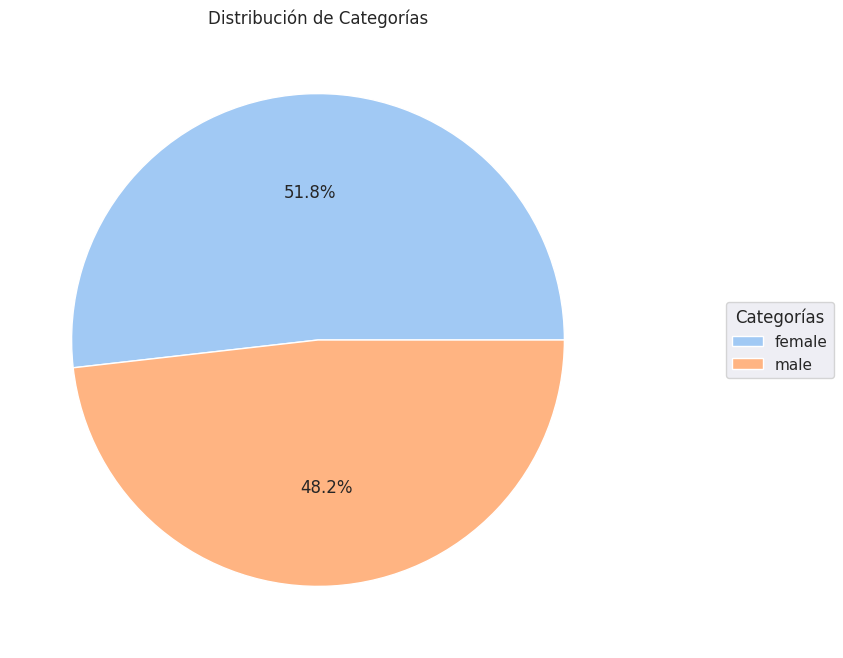

In [ ]:
#Tema seleccionado
sns.set_theme(style="darkgrid", palette="pastel")
#Lo que se va mostrar
counts = df["gender"].value_counts()
#Creación de la figura
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=0)
plt.legend(counts.index, title="Categorías", loc="center", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribución de Categorías')
# Mostrar el gráfico
plt.show()

Distribución de los grupos, esto puede ayudar a entender como se encuentran balanceados los grupos de los estudiantes. Y se puede observar como el grupo C, tiene un mayor porcentaje de presencia.

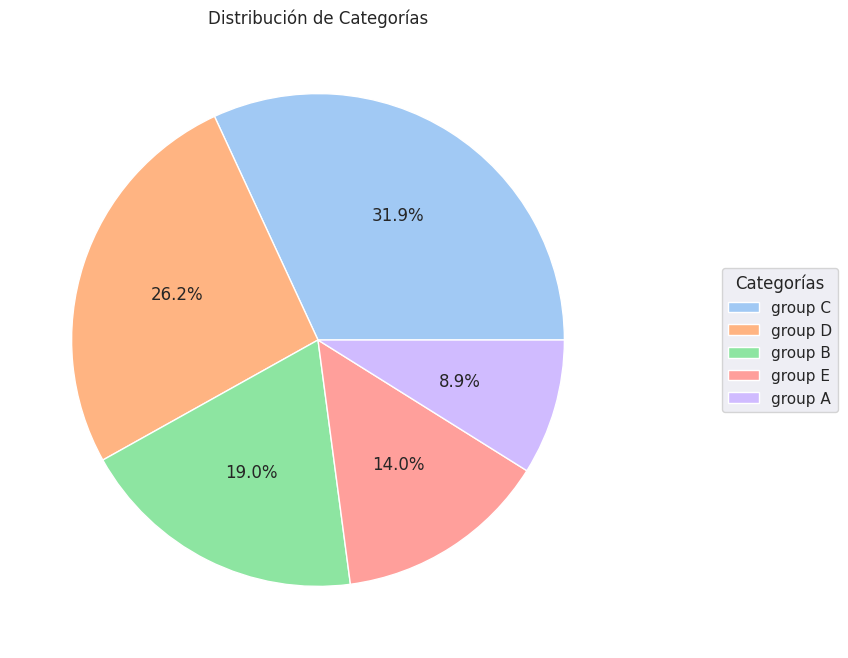

In [ ]:
#Tema seleccionado
sns.set_theme(style="darkgrid", palette="pastel")

#Lo que se va mostrar
counts = df["race/ethnicity"].value_counts()

#Creación de la figura
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=0)
plt.legend(counts.index, title="Categorías", loc="center", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribución de Categorías')

# Mostrar el gráfico
plt.show()

Ahora, como veamos el nivel de estudios de sus padres.
Se usa un gráfico de barras para una fácil comparación de resultados. Se sabe que conforme más especializado sea el grado, menor será el porcentaje de individuos en estos, lo cual se puede ver reflejado con el "master's degree" que vendría siendo una maestría.

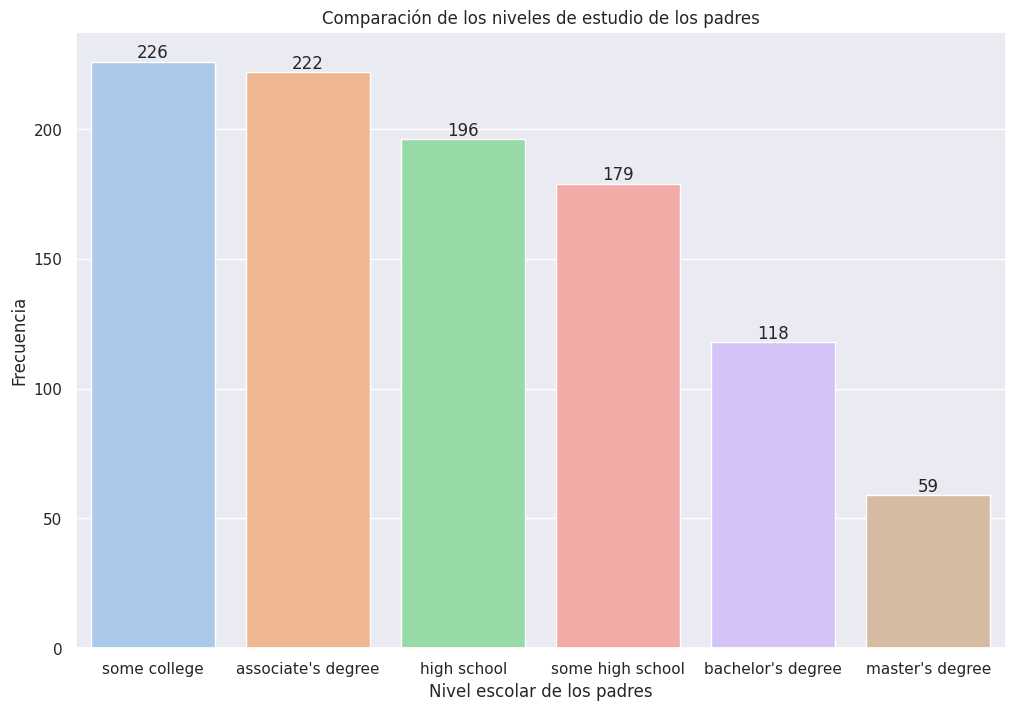

In [ ]:
#Selección de tema
sns.set_theme(style="darkgrid", palette="pastel")
#Tamaño de la figura
plt.figure(figsize=(12, 8))
#Lo que se va mostrar
ax = sns.countplot(x="parental level of education", data=df,
              order=df["parental level of education"].value_counts().index)

#Leyendas
plt.xlabel('Nivel escolar de los padres')
plt.ylabel('Frecuencia')
plt.title("Comparación de los niveles de estudio de los padres")

#Función que muestra los valores enteros de cada categoria.
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

#Mostrar el gráfico
plt.show()

Ahora, veamos a los alumnos que terminaron sus examenes de preparación agrupado por el nivel de estudio de los padres.

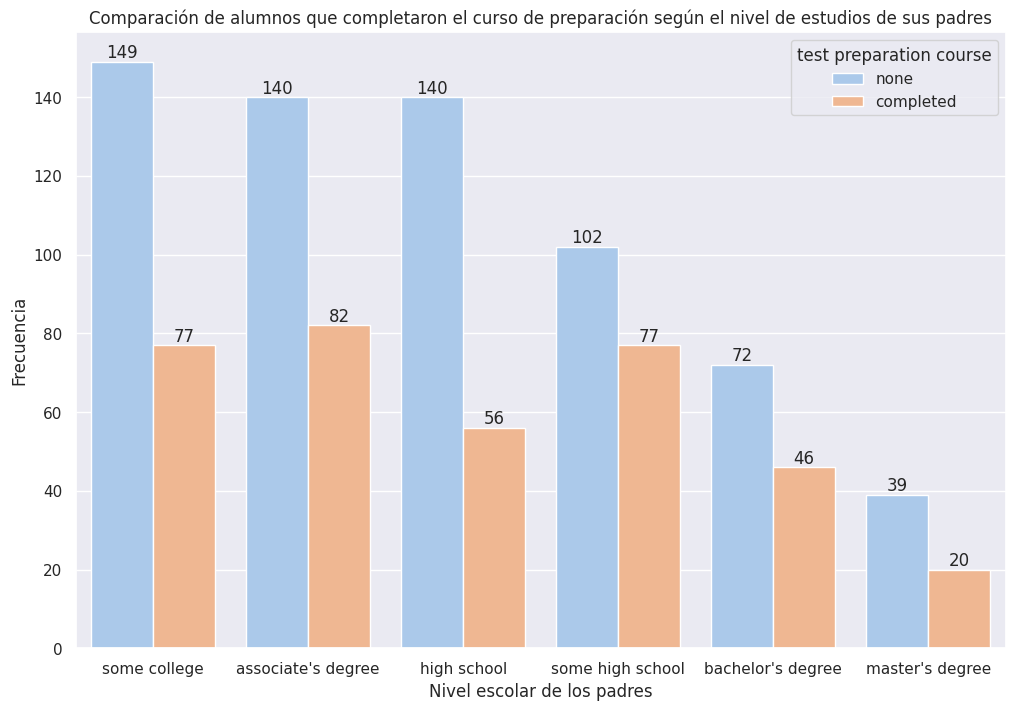

In [ ]:
#Tamaño de la firugra
plt.figure(figsize=(12, 8))

#Creación de un grafico de frecuencia, con separación por la variable de "test preparation course"
ax = sns.countplot(x="parental level of education", data=df,
              order=df["parental level of education"].value_counts().index, hue="test preparation course")

#Leyendas
plt.xlabel('Nivel escolar de los padres')
plt.ylabel('Frecuencia')
plt.title("Comparación de alumnos que completaron el curso de preparación según el nivel de estudios de sus padres")

#Función que muestra los valores enteros de cada categoria.
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

#Mostrar el gráfico
plt.show()

Al mismo tiempo, podemos ver aquellos alumnos que tienen un tipo de lonche agrupados por los niveles de estudio de sus padres.

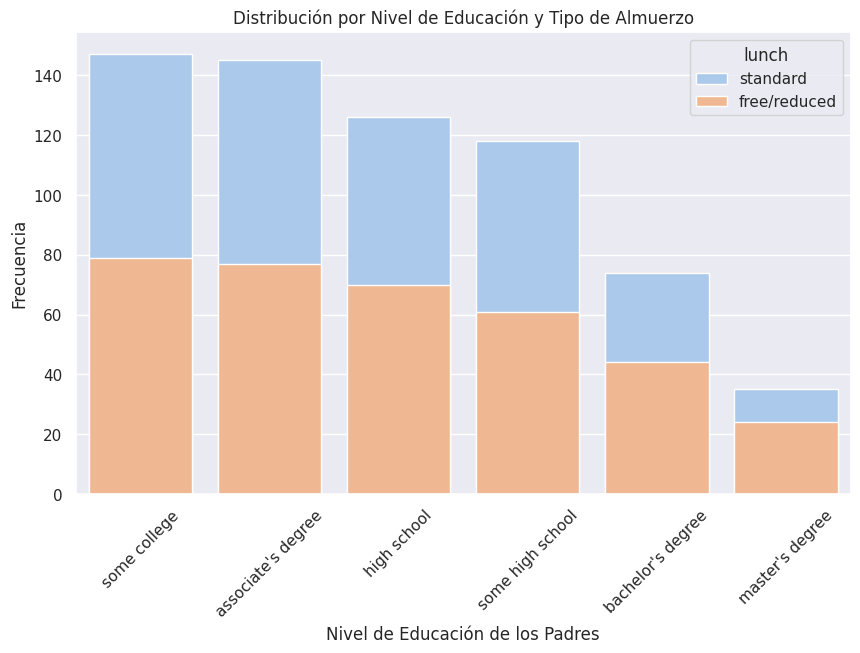

In [ ]:
#Tamaño del gráfico
plt.figure(figsize=(10, 6))

#Creción un histograma para cada la distribución
sns.countplot(data=df, x="parental level of education", hue="lunch", dodge=False,
                order=df["parental level of education"].value_counts().index)

# Leyendas
plt.xticks(rotation=45)
plt.xlabel('Nivel de Educación de los Padres')
plt.ylabel('Frecuencia')
plt.title('Distribución por Nivel de Educación y Tipo de Almuerzo')

# Mostrar el gráfico
plt.show()

Es importante ver la distribución de las calificaciones.

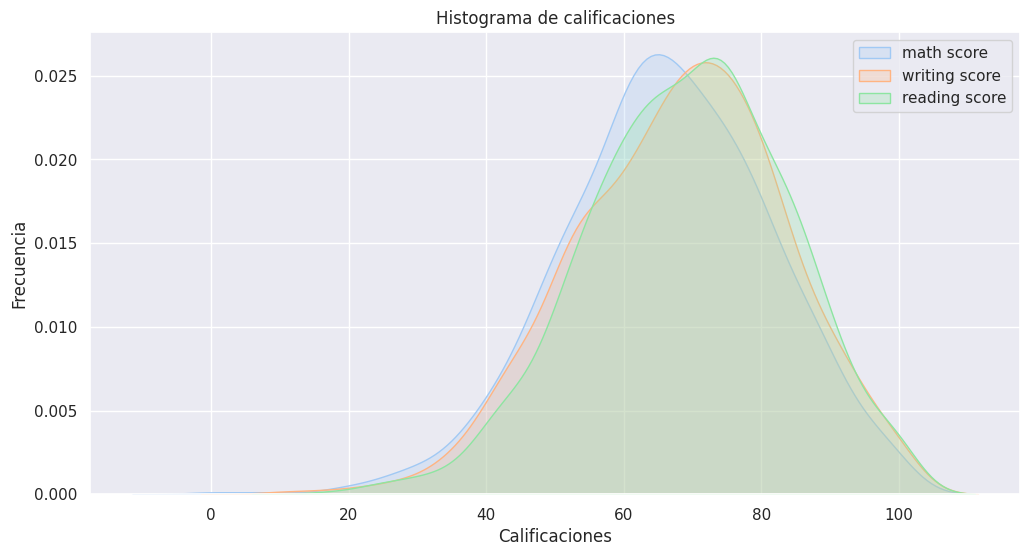

In [ ]:
#Tamaño de la figura
plt.figure(figsize=(12, 6))

#Creción un histograma para cada variable numérica
sns.kdeplot(data=df["math score"], fill=True, label="math score")
sns.kdeplot(data=df["writing score"], fill=True, label="writing score")
sns.kdeplot(data=df["reading score"], fill=True, label="reading score")

#Leyendas
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.title('Histograma de calificaciones')
plt.legend()

#Mostrar el gráfico
plt.show()

Podemos verlo tambien con una distribución de enjambre divididos en genero.

[]

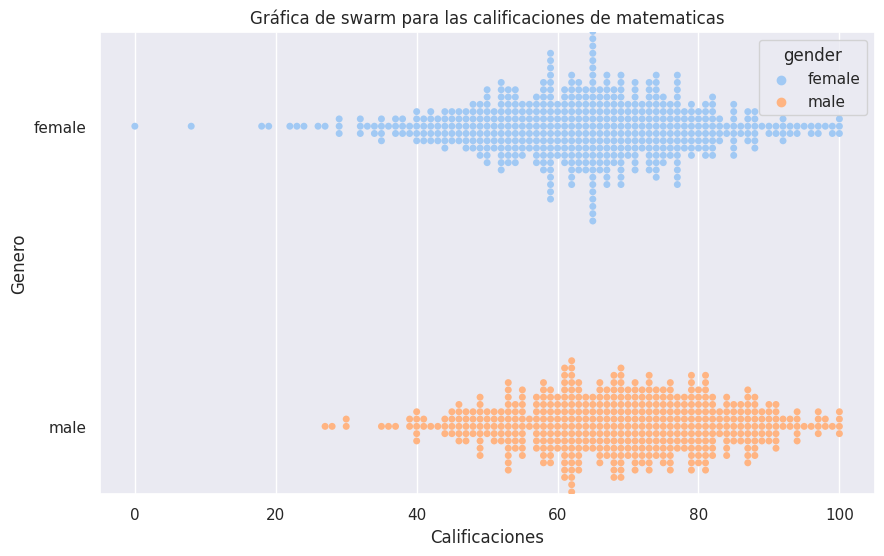

In [ ]:
#Tamaño del gráfico
plt.figure(figsize=(10, 6))

#Creación del grafico de swarm
sns.swarmplot(data=df, x="math score", y="gender", hue="gender")

# Leyendas
plt.xlabel('Calificaciones')
plt.ylabel('Genero')
plt.title('Gráfica de swarm para las calificaciones de matematicas')

#Mostrar grafico
plt.plot()

#Información avanzada.

Ahora crearemos una variable más donde tenemos el promedio de las 3 materias que tienen registradas.

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,standard,none,69,75,78
1,female,group B,some high school,free/reduced,none,18,32,28
2,female,group C,some high school,standard,none,69,73,73
3,female,group D,some high school,free/reduced,none,50,64,59
4,female,group C,some high school,free/reduced,completed,71,84,87
...,...,...,...,...,...,...,...,...
995,female,group E,associate's degree,standard,none,68,76,67
996,male,group C,associate's degree,standard,none,62,65,58
997,female,group C,associate's degree,standard,none,91,95,94
998,female,group C,associate's degree,standard,none,40,59,51


In [ ]:
df["mean"] = (df["math score"] + df["reading score"] + df["writing score"]) / 3
df["mean"] = df["mean"].round(2)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,female,group C,some high school,standard,none,69,75,78,74.00
1,female,group B,some high school,free/reduced,none,18,32,28,26.00
2,female,group C,some high school,standard,none,69,73,73,71.67
3,female,group D,some high school,free/reduced,none,50,64,59,57.67
4,female,group C,some high school,free/reduced,completed,71,84,87,80.67
...,...,...,...,...,...,...,...,...,...
995,female,group E,associate's degree,standard,none,68,76,67,70.33
996,male,group C,associate's degree,standard,none,62,65,58,61.67
997,female,group C,associate's degree,standard,none,91,95,94,93.33
998,female,group C,associate's degree,standard,none,40,59,51,50.00


Podemos ver los promedios de los alumnos, agrupados por grupo de clase y divididos por genero.

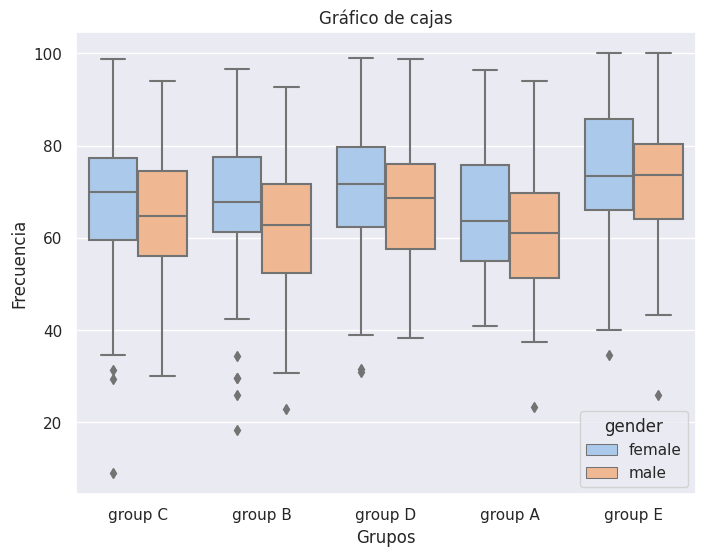

In [ ]:
#Tamaño de la figura
plt.figure(figsize=(8, 6))

#Creación del gráfico de caja
box_plot = sns.boxplot(data = df, x="race/ethnicity", y="mean", hue="gender")

#Leyendas
plt.xlabel('Grupos')
plt.ylabel('Frecuencia')
plt.title('Gráfico de cajas')

#Mostrar la grafica
plt.show()


También podemos ver la distribución del promedio respecto a los que terminaron el examen de practica contra los que no.

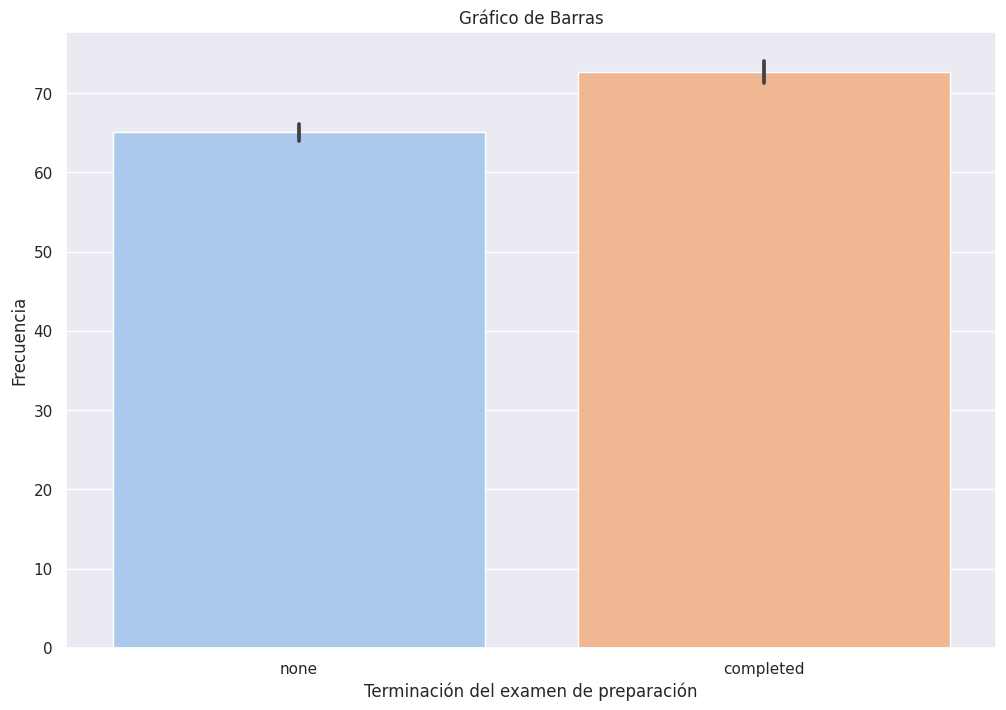

In [ ]:
#Tamaño de la grafica
plt.figure(figsize=(12, 8))

#Creación de la grafica de barras
sns.barplot(data=df, x="test preparation course", y="mean")

#Leyendas
plt.xlabel('Terminación del examen de preparación')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras')

# Mostrar el gráfico
plt.show()


También podemos ver la distribución del promedio respecto al genero.


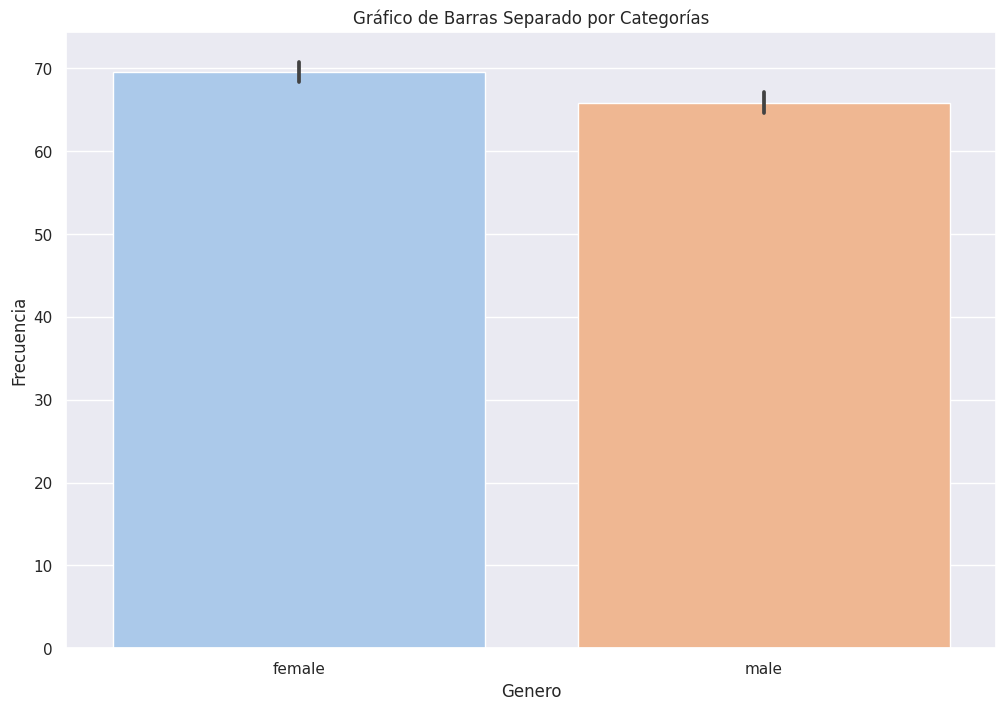

In [ ]:
#Tamaño de la figura
plt.figure(figsize=(12, 8))

#Creación de la grafica
sns.barplot(data=df, x="gender", y="mean")

#Leyendas
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras Separado por Categorías')

# Mostrar el gráfico
plt.show()


Este gráfico de violin permite observar la distribución del promedio de las calificaciones, agrupado por el nivel de estudio de sus padres dividido por genero.

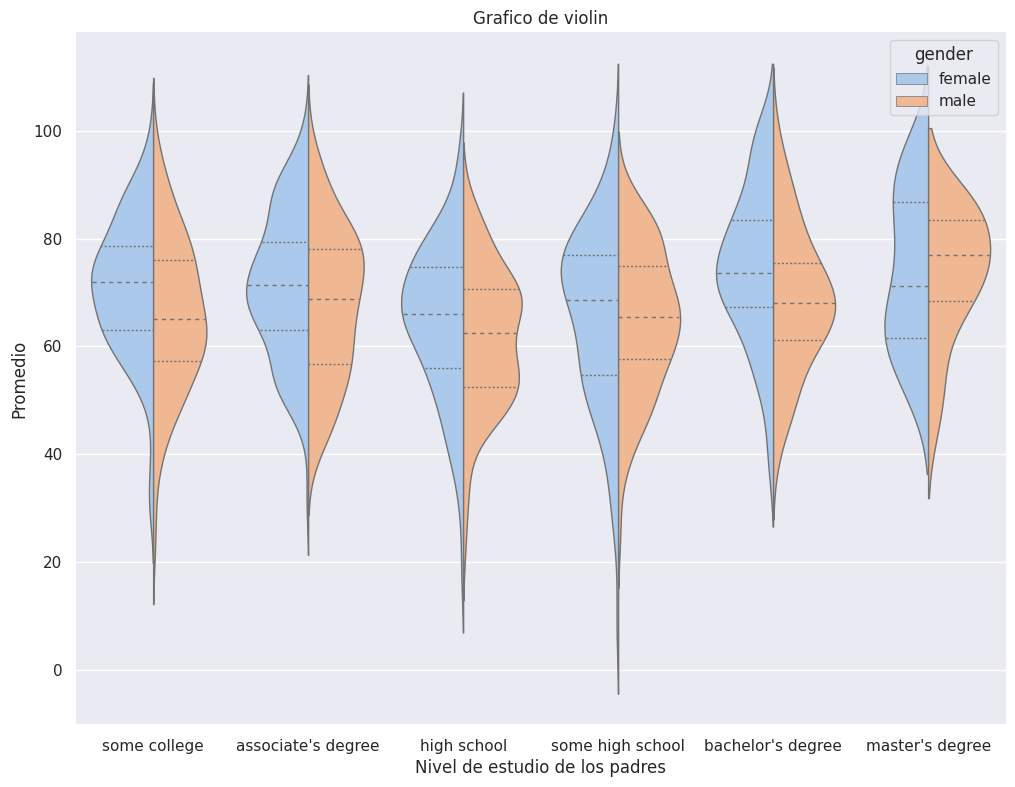

In [ ]:
#Tamaño de la figura
plt.figure(figsize=(12, 9))

#Creación del grafico de violuin
sns.violinplot(data=df, x="parental level of education", y="mean", hue="gender",
               split=True, inner="quart", linewidth=1,
               order=df["parental level of education"].value_counts().index)
sns.despine(left=True)

#Leyendas
plt.xlabel('Nivel de estudio de los padres')
plt.ylabel('Promedio')
plt.title('Grafico de violin')

# Mostrar el gráfico
plt.show()

Este gráfico de violin permite observar la distribución del promedio de las calificaciones, agrupado por sus grupos, dividido por su examen de preparación.

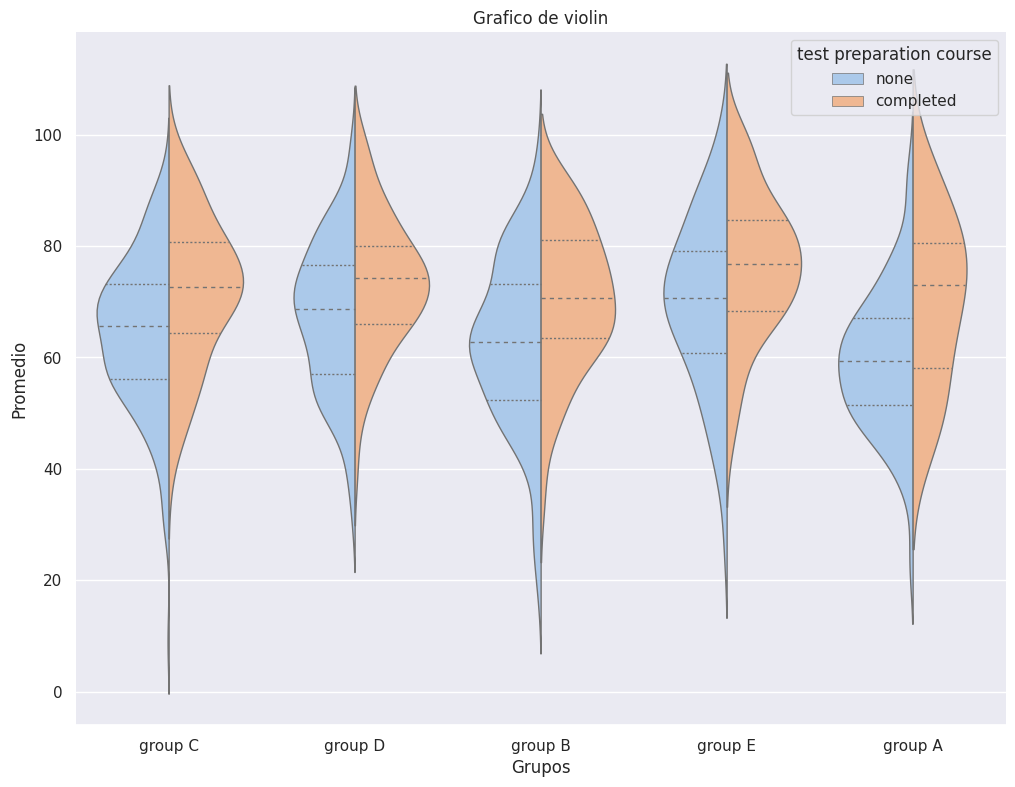

In [ ]:
#Tamaño de la figura
plt.figure(figsize=(12, 9))

#Creación del grafico de violuin
sns.violinplot(data=df, x="race/ethnicity", y="mean", hue="test preparation course",
               split=True, inner="quart", linewidth=1,

               order=df["race/ethnicity"].value_counts().index)
sns.despine(left=True)

#Leyendas
plt.xlabel('Grupos')
plt.ylabel('Promedio')
plt.title('Grafico de violin')

# Mostrar el gráfico
plt.show()

Podemos ver en un mapa de calor la relación entre las variables.

<ipython-input-74-3cc013194590>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


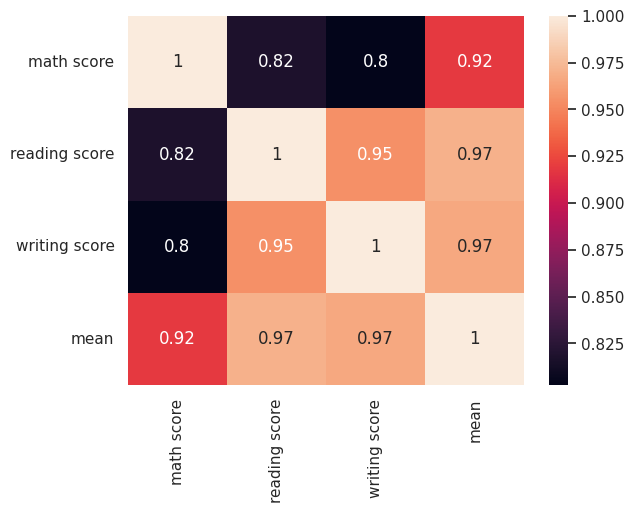

In [ ]:
#Creación del grafico de calor
sns.heatmap(df.corr(), annot=True)

#Mostrar grafico
plt.show()

Finalmente un pairplot para ver todas las variables entre ellas.

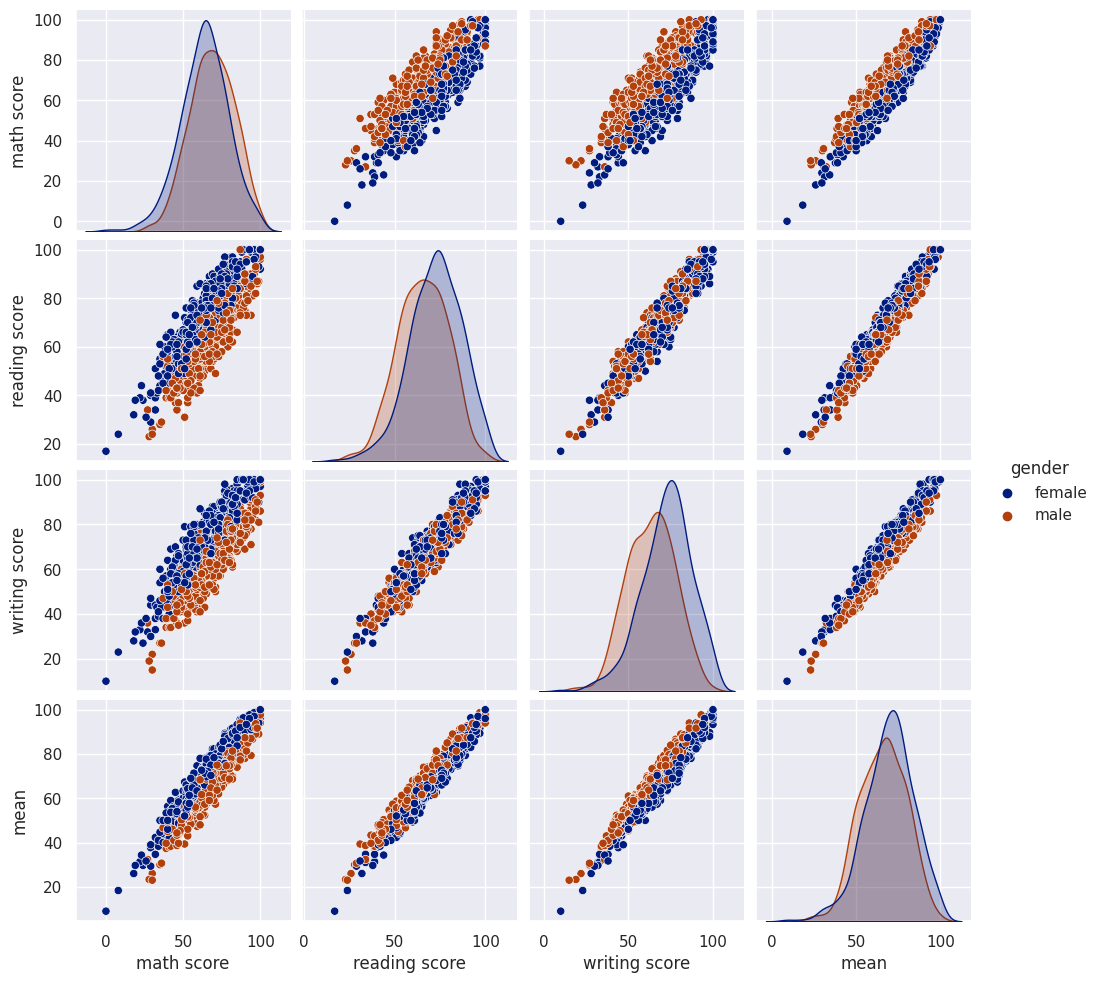

In [ ]:

#Selección de tema
sns.set_theme(style="darkgrid", palette="dark")

#Creación del grafico
sns.pairplot(df,diag_kind="kde", hue="gender")

#Mostrar grafico
plt.show()